In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
file_path = "datasets/heart_dataset.csv"
file_path_factor = "datasets/heart_transformed_pipeline.csv"
file_path_noencoding = "datasets/heart_noencoding.csv"
file_path_raw = "datasets/heart_processed.csv"

# Data Collection

Note:- The dataset has been already preprocessed in *R*.

In [13]:

heart_proc = pd.read_csv(file_path)
heart = pd.read_csv(file_path_factor)
heart_noencode = pd.read_csv(file_path_noencoding)
heart_raw = pd.read_csv(file_path_raw)

In [17]:
heart_proc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Typical,145,233,True,Left_ventricular_hypertrophy,150,No,2,Downsloping,0,Fixed_defect,0
1,67,Male,Asymptomatic,160,286,False,Left_ventricular_hypertrophy,108,Yes,1,Flat,3,Normal,1
2,67,Male,Asymptomatic,120,229,False,Left_ventricular_hypertrophy,129,Yes,2,Flat,2,Reversable_defect,1
3,37,Male,Non-anginal,130,250,False,Normal,187,No,3,Downsloping,0,Normal,0
4,41,Female,Atypical,130,204,False,Left_ventricular_hypertrophy,172,No,1,Upsloping,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,Male,Typical,110,264,False,Normal,132,No,1,Flat,0,Reversable_defect,1
299,68,Male,Asymptomatic,144,193,True,Normal,141,No,3,Flat,2,Reversable_defect,1
300,57,Male,Asymptomatic,130,131,False,Normal,115,Yes,1,Flat,1,Reversable_defect,1
301,57,Female,Atypical,130,236,False,Left_ventricular_hypertrophy,174,No,0,Flat,1,Normal,1


In [16]:
# Convert target to binary
heart_raw.head()

heart_raw['target'] = heart['target']

# Exploratory Data Analysis

## Histogram

Numerical variables

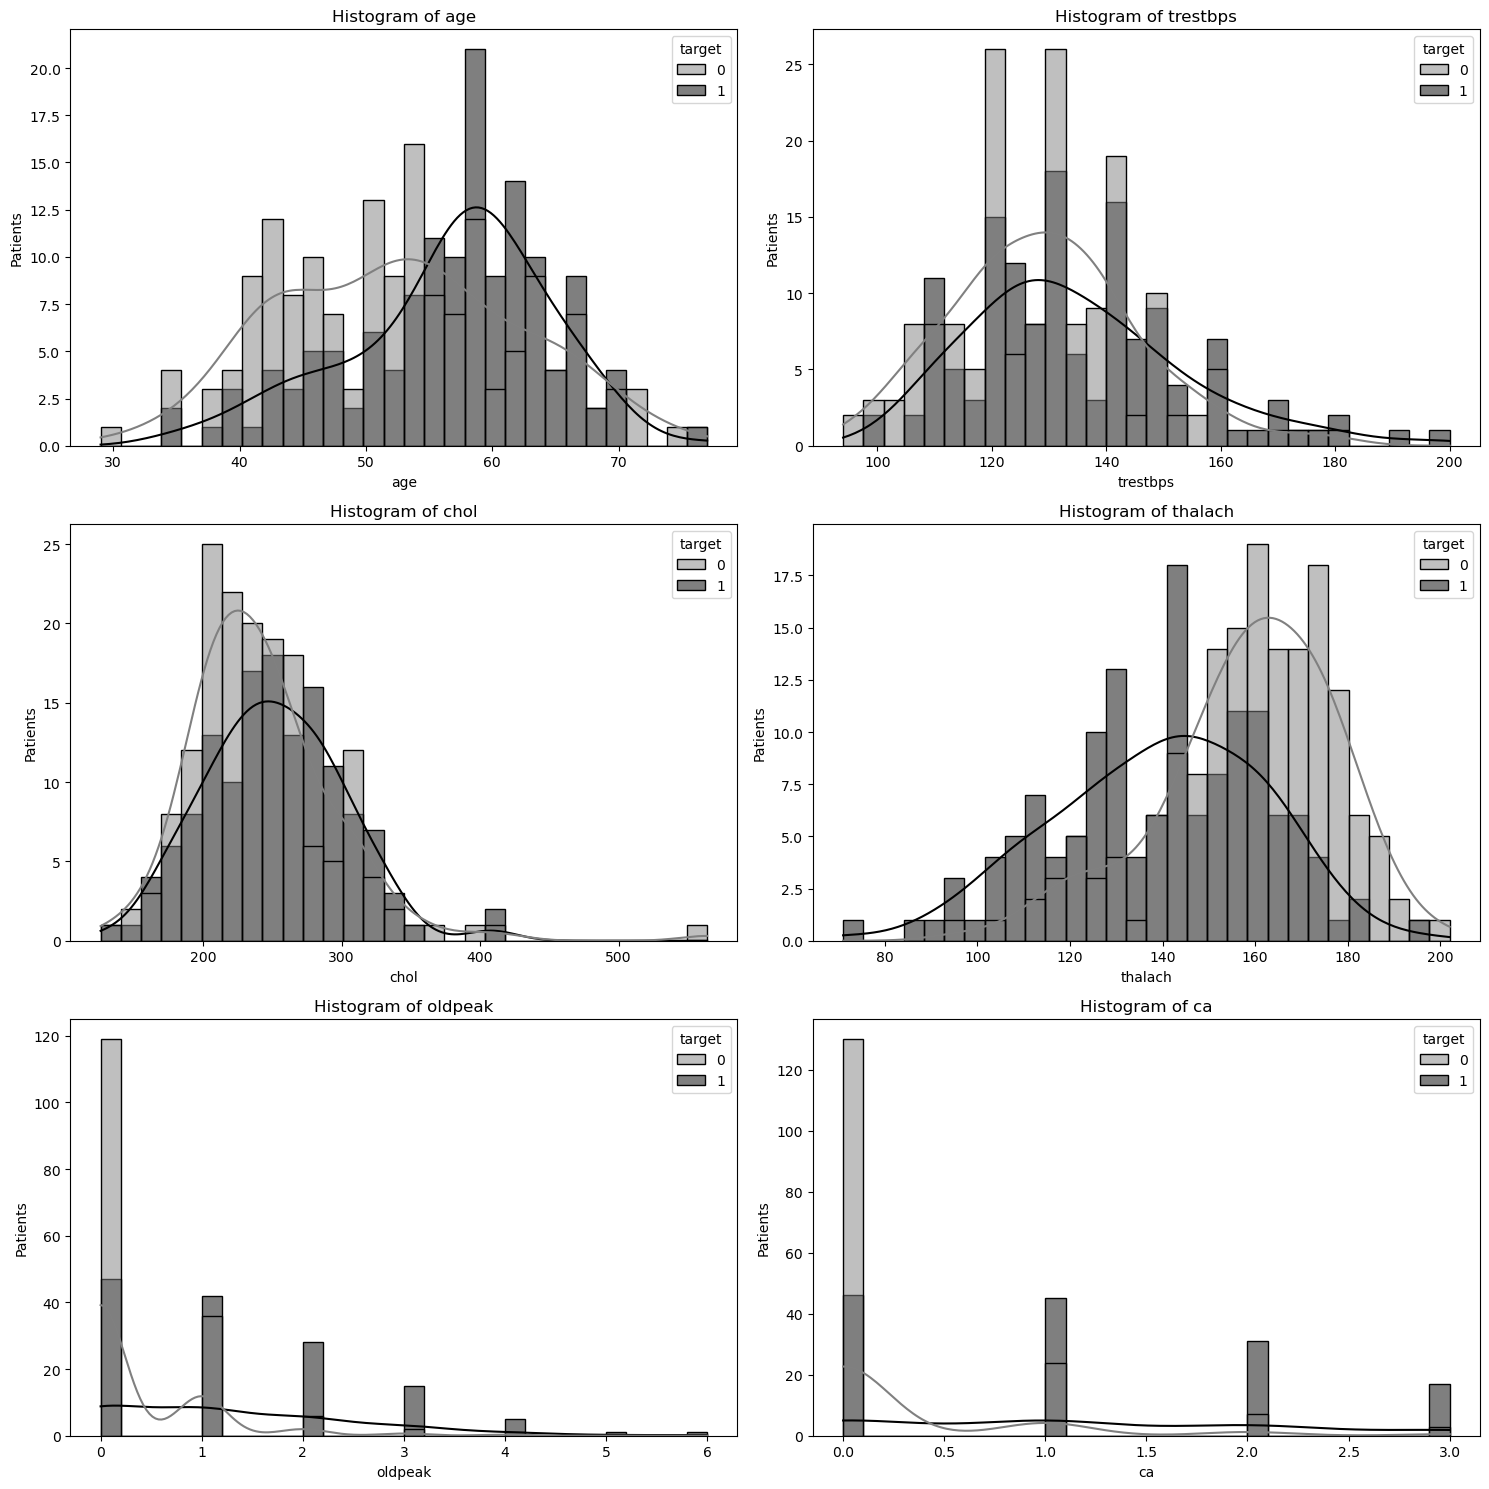

In [18]:


# Redefining the list of continuous features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Plotting histograms with hue as target using seaborn
plt.figure(figsize=(15, 15))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=heart_proc, x=feature, hue='target', kde=True, bins=30, palette=[(0.5,0.5,0.5),(0,0,0)])
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Patients')

plt.tight_layout()
plt.show()


Categorical Variables

/Users/prajwalamin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:461: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/Users/prajwalamin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:462: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


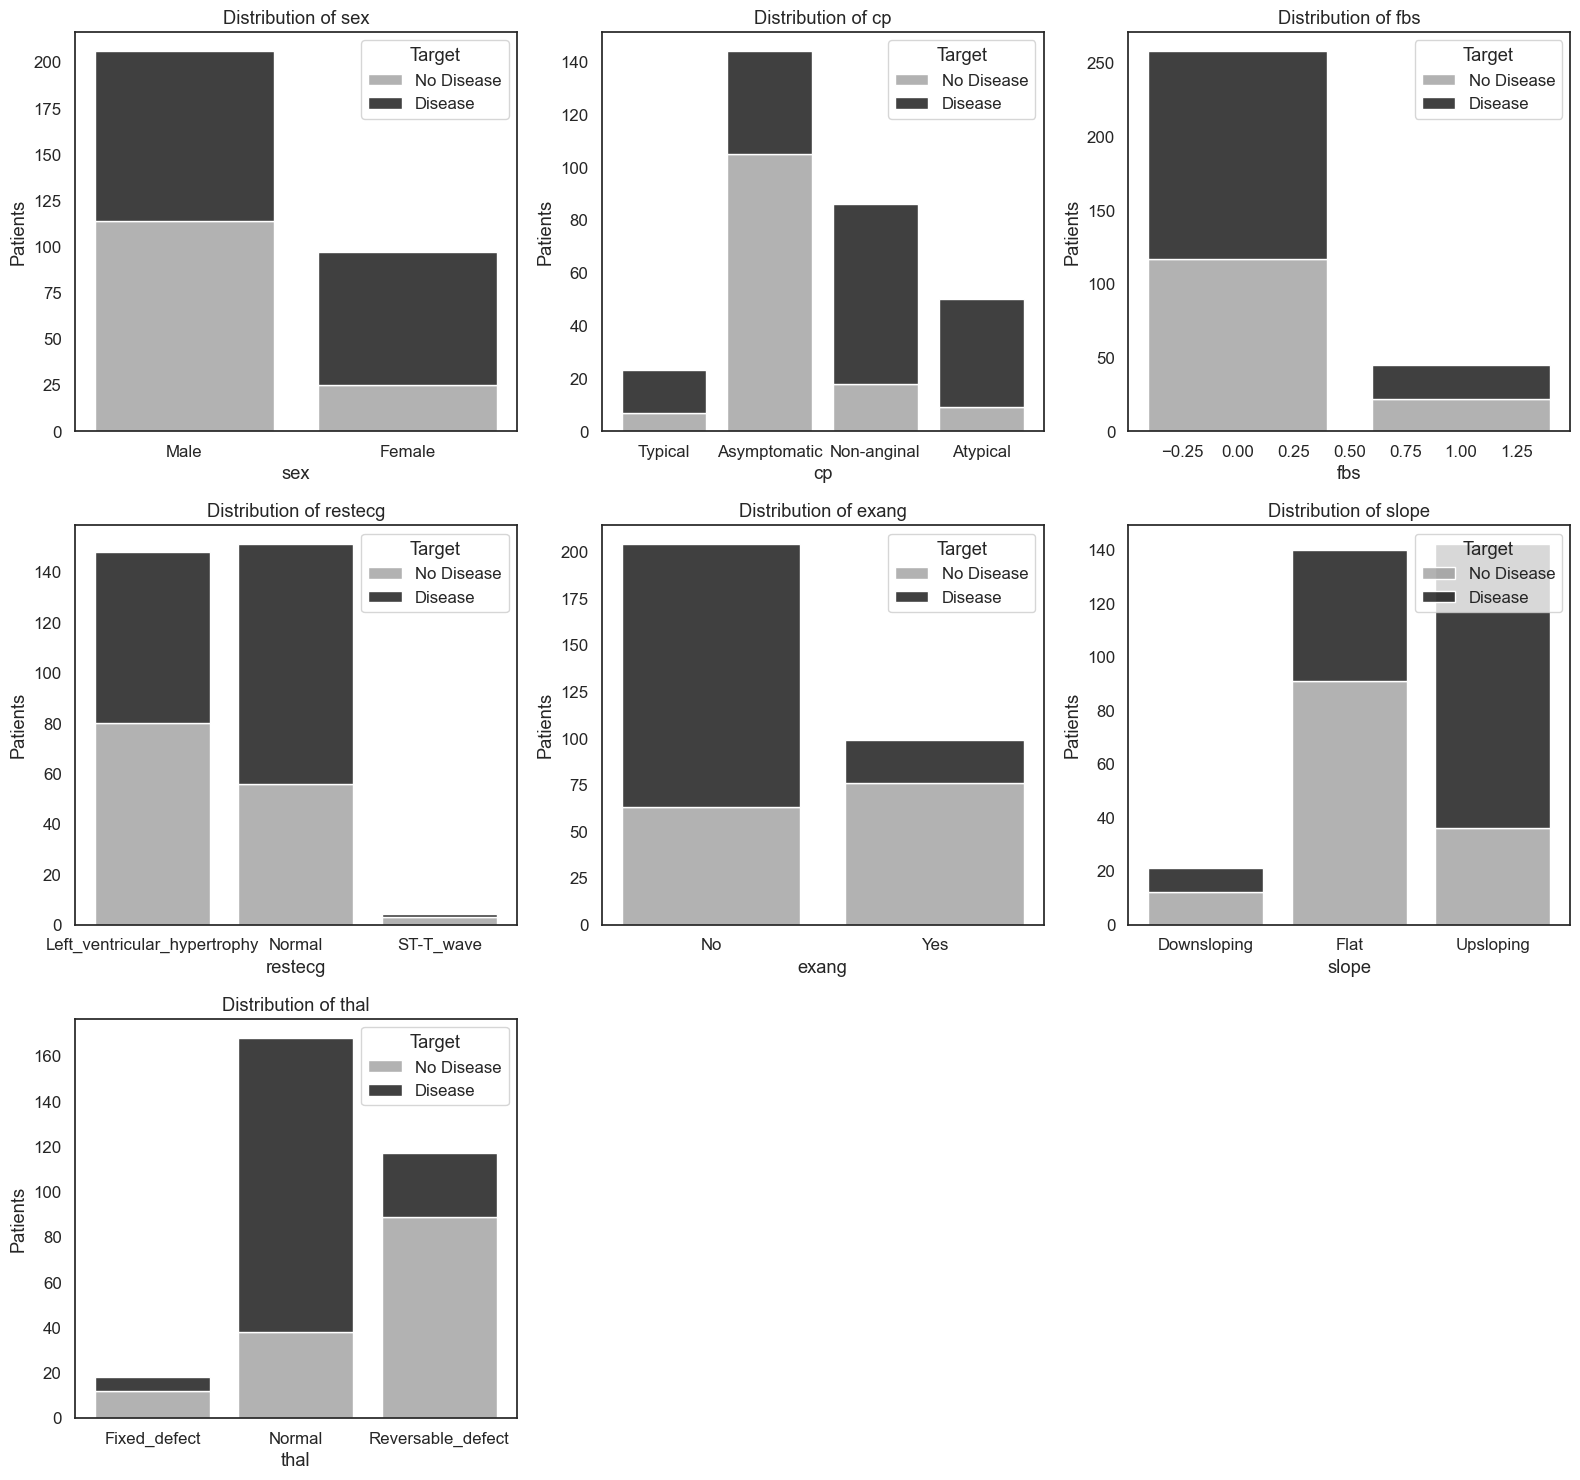

In [149]:

# Assuming the columns not in continuous_features are categorical
categorical_features = [col for col in heart_raw.columns if col not in numerical_features + ['target']]

# Plotting stacked bar plots for categorical features using seaborn with "tab10" palette
plt.figure(figsize=(16, 15))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    
    # Creating a stacked barplot in seaborn
    sns.histplot(data=heart_proc, x=feature, hue='target', multiple='stack', palette=[(0,0,0),(0.6,0.6,0.6)], shrink=0.8, discrete=True)
    ()
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Patients')
    plt.legend(title='Target', labels=['No Disease', 'Disease'], loc='upper right')

plt.tight_layout()

plt.show()




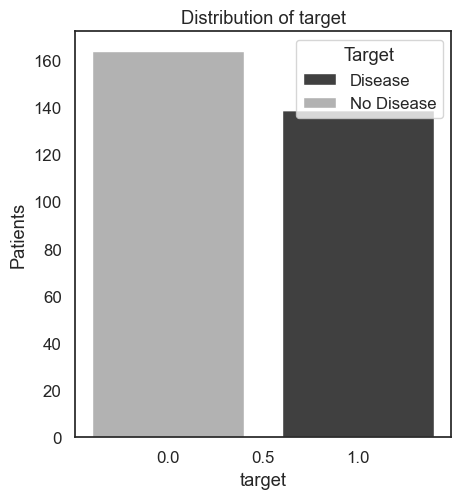

In [147]:

# Assuming the columns not in continuous_features are categorical
categorical_features = [col for col in heart_raw.columns if col not in numerical_features + ['target']]

# Plotting stacked bar plots for categorical features using seaborn with "tab10" palette
plt.figure(figsize=(18, 14))

plt.subplot(3, 4, i)
    
# Creating a stacked barplot in seaborn
sns.histplot(data=heart_proc, x='target', hue='target', multiple='stack', palette=[(0.6,0.6,0.6),(0,0,0)], shrink=0.8, discrete=True)
()
plt.title(f'Distribution of target')
plt.xlabel('target')
plt.ylabel('Patients')
plt.legend(title='Target', labels=['Disease', 'No Disease'], loc='upper right')

plt.tight_layout()


plt.show()




## Correlation

In [95]:
# Finding the correlation of the variables
correlation = heart_raw.corr().abs()
correlation["target"].sort_values(ascending=False)


target      1.000000
ca          0.518909
thal        0.509923
oldpeak     0.507249
thalach     0.415040
cp          0.407075
exang       0.397057
slope       0.377957
sex         0.224469
age         0.222853
restecg     0.183696
trestbps    0.157754
chol        0.070909
fbs         0.059186
Name: target, dtype: float64

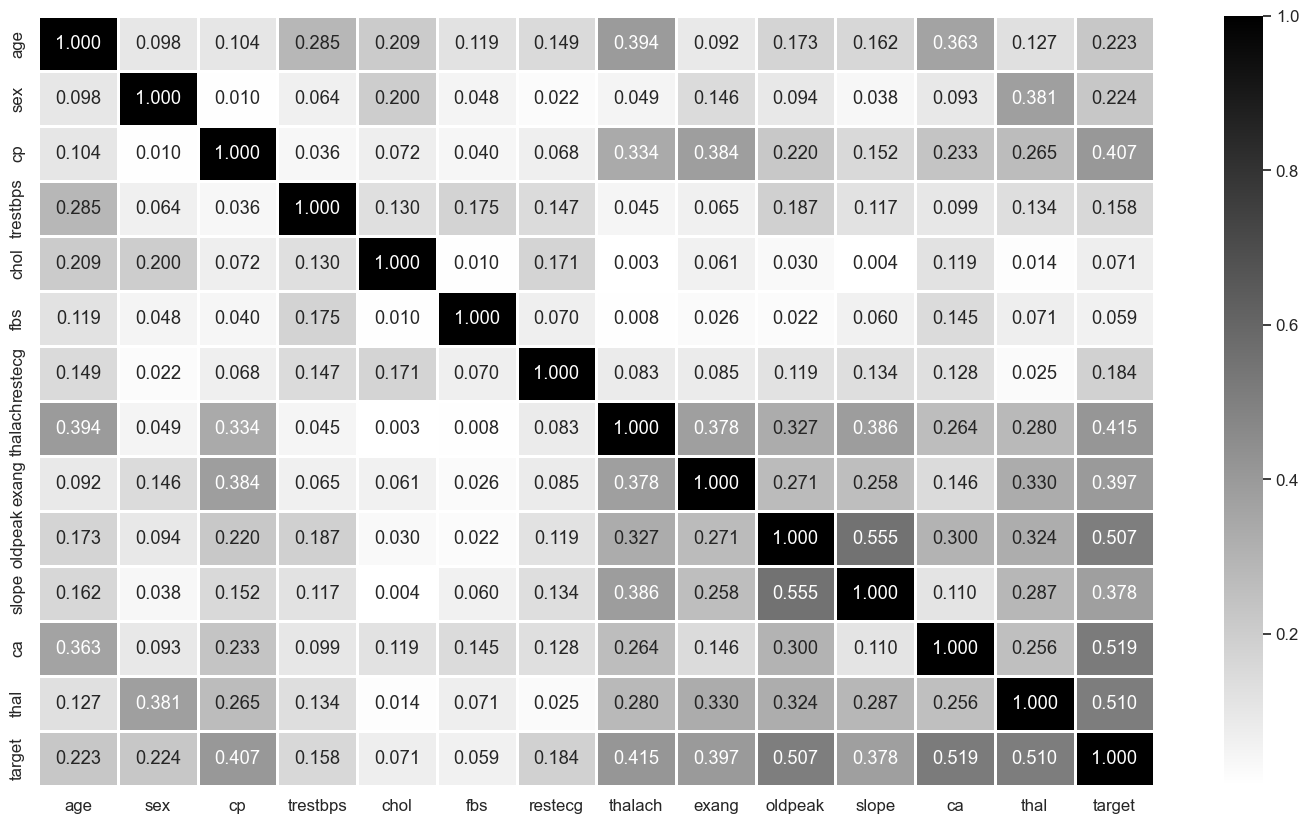

In [130]:
# Correlation heatmap

sns.set(font_scale=1.1)
mask = np.triu(correlation)
plt.figure(figsize=(18, 10))
sns.heatmap(correlation,
            annot=True,
            fmt='.3f',
            cmap="binary",
            linewidths=1,
            cbar=True)


plt.show()

Pearson Correlation (Numerical)

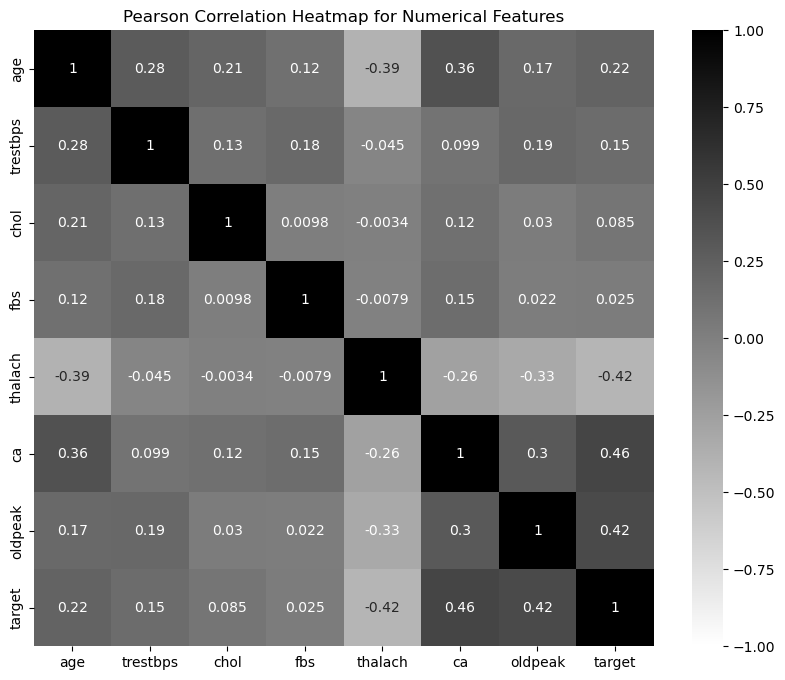

In [172]:
# Importing necessary libraries and re-computing the correlations and visualizations
from scipy.stats import chi2_contingency

# Loading the dataset
heart_data = heart_raw

# Separate numerical and categorical features
numerical_features = ['age', 'trestbps', 'chol', 'fbs', 'thalach', 'ca', 'oldpeak', 'target']
categorical_features = ['cp','sex', 'restecg','slope','exang',  'thal', 'target']

pearson_corr = heart_data[numerical_features].corr()

# Visualizing Pearson correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='binary', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap for Numerical Features')
plt.show()


Chi-square test (Categorical)

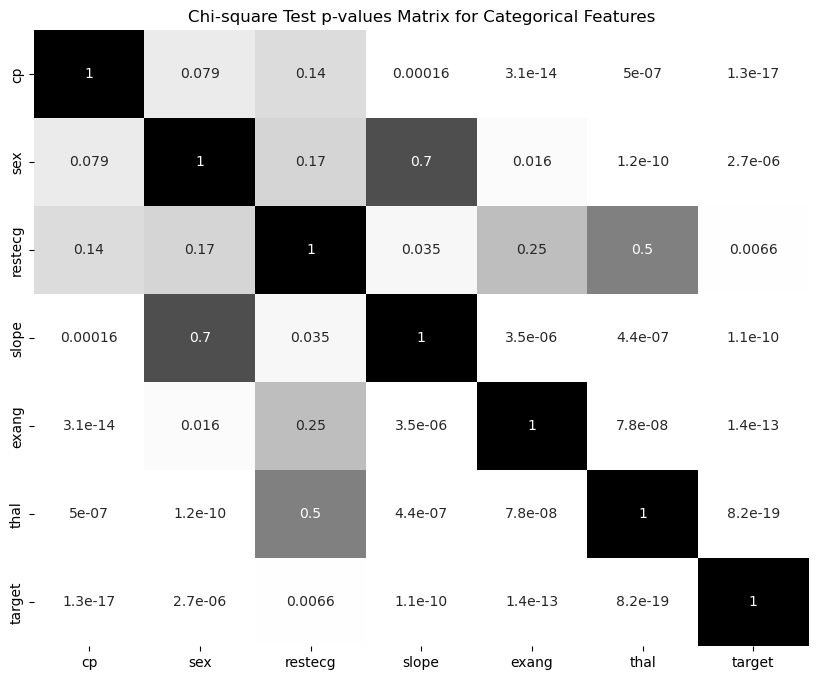

In [171]:
# Compute chi-square p-values for categorical features
chi2_p_values = {}
for i in range(len(categorical_features)):
    for j in range(i+1, len(categorical_features)):
        contingency = pd.crosstab(heart_data[categorical_features[i]], heart_data[categorical_features[j]])
        _, p, _, _ = chi2_contingency(contingency)
        chi2_p_values[(categorical_features[i], categorical_features[j])] = p


# Visualizing Chi-square p-values matrix for categorical features
chi2_matrix = np.zeros((len(categorical_features), len(categorical_features)))
for i in range(len(categorical_features)):
    for j in range(len(categorical_features)):
        if i != j:
            p_value = chi2_p_values.get((categorical_features[i], categorical_features[j]), 
                                        chi2_p_values.get((categorical_features[j], categorical_features[i])))
            chi2_matrix[i, j] = p_value
        else:
            chi2_matrix[i, j] = 1  # diagonal values are set to 1 as they're not useful

plt.figure(figsize=(10, 8))
sns.heatmap(chi2_matrix, annot=True, cmap='binary', xticklabels=categorical_features, yticklabels=categorical_features, cbar=False)
plt.title('Chi-square Test p-values Matrix for Categorical Features')
plt.show()

## Outliers

In [57]:
df = heart

# Calculate z-score for each variable
z_scores = np.abs((df - df.mean()) / df.std())

# Define threshold
threshold = 3

# Identify outliers for each variable
outliers = (z_scores > threshold).sum()

# Report number of outliers for each variable
print("Number of outliers for each variable: ")
print(outliers)


Number of outliers for each variable: 
age         0
sex         0
cp          0
trestbps    2
chol        4
fbs         0
restecg     0
thalach     1
exang       0
oldpeak     8
slope       0
ca          0
thal        0
target      0
dtype: int64


In [58]:
heart["oldpeak"]

0      2
1      1
2      2
3      3
4      1
      ..
298    1
299    3
300    1
301    0
302    0
Name: oldpeak, Length: 303, dtype: int64

## Missing values

In [795]:
heart_raw.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

## Data Splitting

In [277]:
# Creating a train and test split from the data.
from sklearn.model_selection import train_test_split

# FAMD
X_noohe = heart_noencode.drop(columns=('target'))
y_noohe = heart_noencode["target"]

# t-SNE
X = heart.drop(columns=("target"))
y = heart["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [748]:
from imblearn.over_sampling import ADASYN, SMOTE

# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Patient Segmentation

## FAMD

In [189]:
from prince import FAMD


famd = FAMD(n_components = 3, n_iter=10, random_state = 42)

famd.fit(X_noohe)
X_famd =  famd.transform(X_noohe)


fig = px.scatter_3d(x=X_famd[0], y=X_famd[1], z=X_famd[2], 
                    color=heart_noencode['target'])


# sns.scatterplot(X_famd[0], X_famd[1], hue=heart_noencode['target'] , palette='Set1')
# plt.title("Factor Analysis on Mixed Data", fontsize=15, pad=15)

famd.eigenvalues_summary
# famd.eigenvalues_


,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,8.330,17.35%,17.35%
1,4.543,9.47%,26.82%
2,4.499,9.37%,36.19%


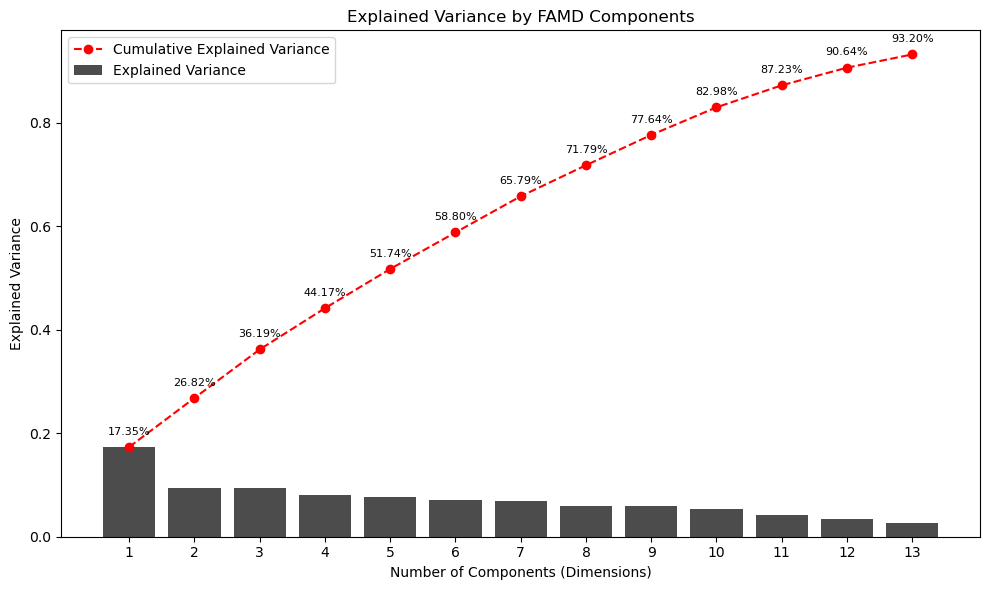

In [190]:
# Recreating the data and dataframe
explained_variance = {
    'eigenvalue': [8.330, 4.543, 4.499, 3.827, 3.638, 3.389, 3.353, 2.881, 2.806, 2.568, 2.036, 1.639, 1.229],
    '% of variance': [0.1735, 0.0947, 0.0937, 0.0797, 0.0758, 0.0706, 0.0698, 0.0600, 0.0585, 0.0535, 0.0424, 0.0341, 0.0256],
    '% of variance (cumulative)': [0.1735, 0.2682, 0.3619, 0.4417, 0.5174, 0.5880, 0.6579, 0.7179, 0.7764, 0.8298, 0.8723, 0.9064, 0.9320]
}
explained_variance = pd.DataFrame(explained_variance)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(explained_variance.index + 1, explained_variance['% of variance'], label='Explained Variance', alpha=0.7, color='black')
ax.plot(explained_variance.index + 1, explained_variance['% of variance (cumulative)'], marker='o', linestyle='--', color='r', label='Cumulative Explained Variance')
# Annotating the cumulative values
for i, value in enumerate(explained_variance['% of variance (cumulative)']):
    ax.text(i+1, value + 0.02, f"{value:.2%}", ha='center', va='bottom', fontsize=8)

ax.set_title('Explained Variance by FAMD Components')
ax.set_xlabel('Number of Components (Dimensions)')
ax.set_ylabel('Explained Variance')
ax.set_xticks(explained_variance.index + 1)
ax.legend()
plt.tight_layout()
plt.show()


In [191]:
explained_variance

,eigenvalue,% of variance,% of variance (cumulative)
0,8.330,0.1735,0.1735
1,4.543,0.0947,0.2682
2,4.499,0.0937,0.3619
3,3.827,0.0797,0.4417
4,3.638,0.0758,0.5174
5,3.389,0.0706,0.5880
6,3.353,0.0698,0.6579
7,2.881,0.0600,0.7179
8,2.806,0.0585,0.7764
9,2.568,0.0535,0.8298


In [192]:
import plotly.express as px

# Creating a DataFrame for easier plotting
df_famd = pd.DataFrame({'Component 1': X_famd[0], 
                        'Component 2': X_famd[1], 
                        'Component 3': X_famd[2], 
                        'Target': heart_noencode['target']})

# Create 3D scatter plot with adjusted marker size and opacity
fig = px.scatter_3d(df_famd, x='Component 1', y='Component 2', z='Component 3', 
                    color='Target', color_continuous_scale='Cividis')  # Adjusting size and opacity here

#  marker=dict(size=5, opacity=0.5)

fig.update_traces(marker=dict(size=6, line=dict(color='rgba(0,0,0,0.5)', width=1), opacity=0.75, color=df_famd['Target']),
                  selector=dict(mode='markers'))


# fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)')

fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)', 
                  margin=dict(l=20, r=20, t=20, b=20))



# Save the figure
plt.savefig('famd_reduced.png', dpi=300, bbox_inches='tight')

import plotly.io as pio

# Save the plot as an HTML file
# pio.write_html(fig, file='famd_3d_plot.html', auto_open=True)



fig.show()


<Figure size 640x480 with 0 Axes>

In [193]:
famd.column_contributions_.style.format('{:.0%}')

component,0,1,2
variable,,,
age,1%,0%,1%
trestbps,0%,1%,1%
chol,0%,0%,1%
thalach,4%,1%,1%
oldpeak,4%,0%,1%
ca,2%,0%,0%
cp,6%,7%,2%
exang,6%,1%,0%
fbs,0%,7%,0%


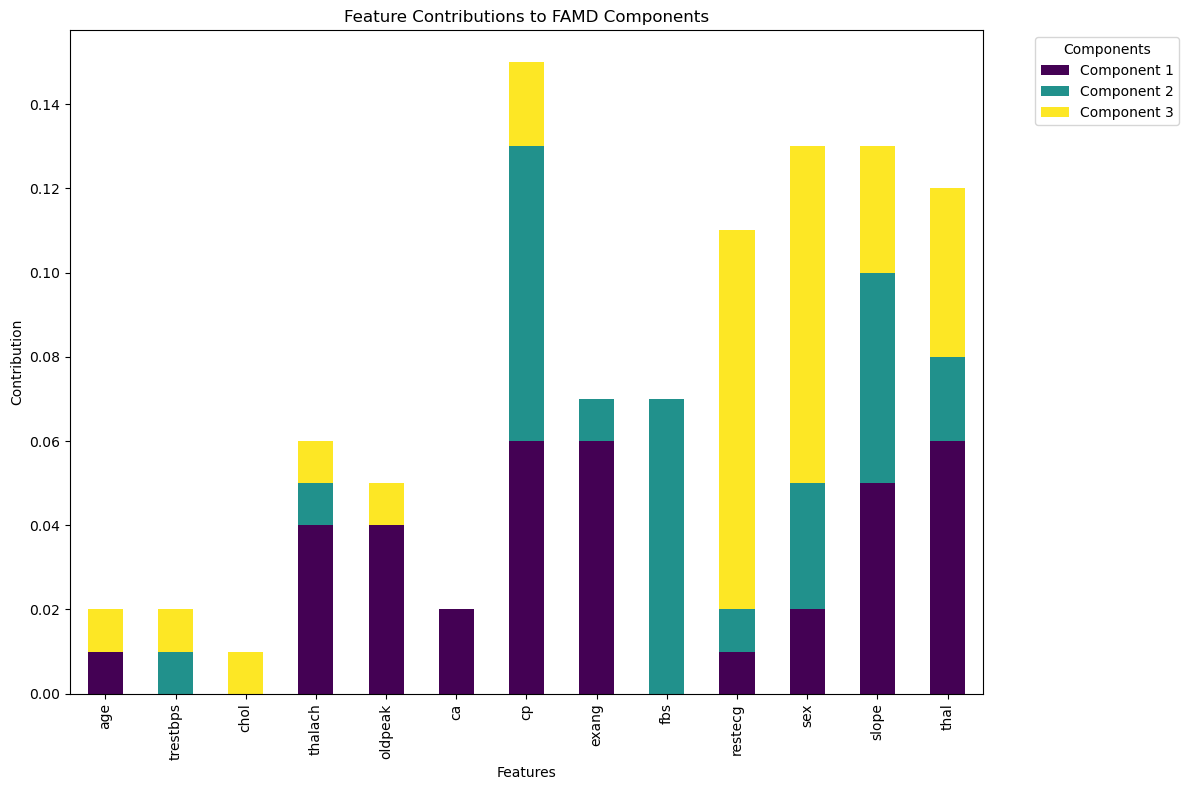

In [194]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'age': [0.01, 0, 0.01],
    'trestbps': [0, 0.01, 0.01],
    'chol': [0, 0, 0.01],
    'thalach': [0.04, 0.01, 0.01],
    'oldpeak': [0.04, 0, 0.01],
    'ca': [0.02, 0, 0],
    'cp': [0.06, 0.07, 0.02],
    'exang': [0.06, 0.01, 0],
    'fbs': [0, 0.07, 0],
    'restecg': [0.01, 0.01, 0.09],
    'sex': [0.02, 0.03, 0.08],
    'slope': [0.05, 0.05, 0.03],
    'thal': [0.06, 0.02, 0.04]
}

df = pd.DataFrame(data, index=['Component 1', 'Component 2', 'Component 3']).T

# barchart
ax = df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap="viridis")
plt.title('Feature Contributions to FAMD Components')
plt.ylabel('Contribution')
plt.xlabel('Features')
plt.legend(title='Components', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



## Clustering

In [195]:
from sklearn.cluster import KMeans

# Create a KMeans object
# The n_clusters parameter determines the number of clusters that the algorithm will form
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)

# Fit the KMeans object on the reduced data
# This will segment your data into the specified number of clusters
kmeans.fit(X_famd)

# You can get the cluster assignments for each data point using the labels_ attribute
cluster_assignments = kmeans.labels_ + 1



In [196]:
import pandas as pd

# Add the cluster assignments to the original DataFrame
df_original_famd = pd.DataFrame(heart_proc)  # assuming X is your original data
df_original_famd["Cluster"] = cluster_assignments

# Compute descriptive statistics for each cluster
for i in range(kmeans.n_clusters):
   print(f"Cluster {i}:")
   print(df_original_famd[df_original_famd["Cluster"] == i + 1].describe(include='all'))


Cluster 0:
               age   sex           cp    trestbps        chol    fbs restecg  \
count   158.000000   158          158  158.000000  158.000000    158     158   
unique         NaN     2            4         NaN         NaN      2       3   
top            NaN  Male  Non-anginal         NaN         NaN  False  Normal   
freq           NaN    83           70         NaN         NaN    139      93   
mean     52.145570   NaN          NaN  129.689873  246.139241    NaN     NaN   
std       9.404448   NaN          NaN   15.898525   55.489308    NaN     NaN   
min      29.000000   NaN          NaN   94.000000  126.000000    NaN     NaN   
25%      44.000000   NaN          NaN  120.000000  210.250000    NaN     NaN   
50%      52.000000   NaN          NaN  130.000000  239.000000    NaN     NaN   
75%      58.000000   NaN          NaN  140.000000  272.500000    NaN     NaN   
max      76.000000   NaN          NaN  192.000000  564.000000    NaN     NaN   

           thalach exang    

In [197]:
famd_arr = np.array(X_famd)

In [198]:


# Assume that 'X_tsne' is your data after t-SNE reduction and it has two dimensions
# 'df_original' is your original dataset with all the features

df_famd = pd.DataFrame(famd_arr, columns=["Dimension 1", "Dimension 2", 'Dimension 3'])
df_famd['Cluster'] = cluster_assignments

# Add original features to the DataFrame for hover data
for col in df_original_famd.columns:
    df_famd[col] = df_original_famd[col]

fig = px.scatter_3d(df_famd, x='Dimension 1', y='Dimension 2',z='Dimension 3', color='Cluster', 
                 hover_data=df_famd.columns,  color_continuous_scale='Cividis_r')

fig.update_traces(marker=dict(size=6, line=dict(color='rgba(0,0,0,0.5)', width=1),opacity=0.5, color=df_famd['Cluster']),
                  selector=dict(mode='markers'))


# fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)')

fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)', 
                  margin=dict(l=20, r=20, t=20, b=20))

# Save the plot as an HTML file
# pio.write_html(fig, file='famd_clustering.html', auto_open=True)

fig.show()


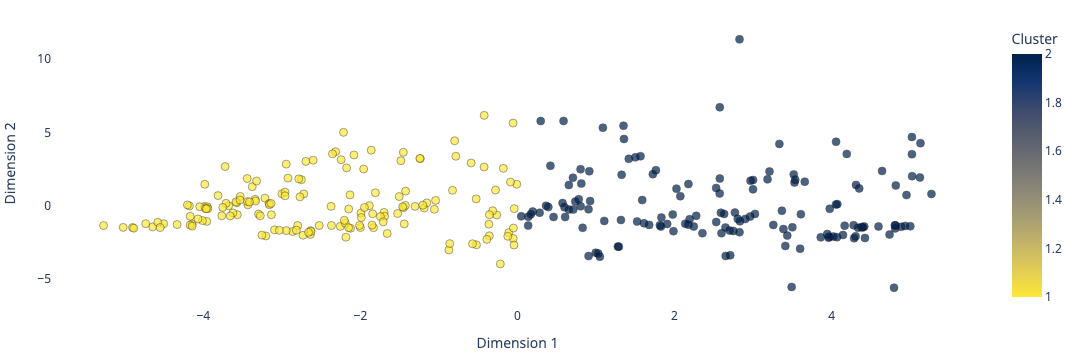

In [215]:


# Assume that 'X_tsne' is your data after t-SNE reduction and it has two dimensions
# 'df_original' is your original dataset with all the features

df_famd = pd.DataFrame(famd_arr, columns=["Dimension 1", "Dimension 2", 'Dimension 3'])
df_famd['Cluster'] = cluster_assignments

# Add original features to the DataFrame for hover data
for col in df_original_famd.columns:
    df_famd[col] = df_original_famd[col]

fig = px.scatter(df_famd, x='Dimension 1', y='Dimension 2', color='Cluster', 
                 hover_data=df_famd.columns,  color_continuous_scale='Cividis_r')

fig.update_traces(marker=dict(size=8, line=dict(color='rgba(0,0,0,0.5)', width=1),opacity=0.7, color=df_famd['Cluster']),
                  selector=dict(mode='markers'))


# fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)')

fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)', 
                  margin=dict(l=20, r=20, t=20, b=20))

fig.show()


Cluster Characteristics

Classification of the target

In [200]:
# Calculate the distribution of the target variable within each of the 2 clusters
cluster_dist_famd = pd.crosstab(kmeans.labels_ +1, y, rownames=['Cluster'], colnames=['Heart Disease'])

cluster_dist_famd

Heart Disease,0,1
Cluster,,
1,134,24
2,30,115


Probability of cluster membership of missclassified points

## TSNE

/Users/prajwalamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/prajwalamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



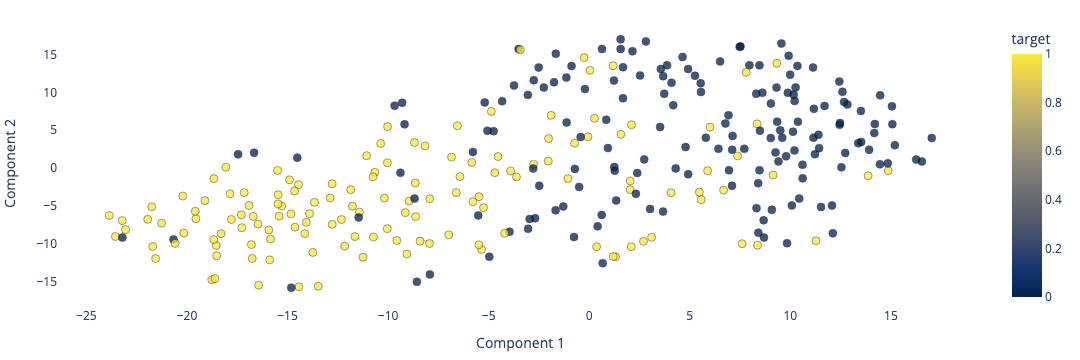

In [201]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2,random_state=42)
X_tsne = tsne.fit_transform(X)

# Converting to DataFrame for visualization
df_tsne = pd.DataFrame(X_tsne, columns=['Component 1', 'Component 2'])
df_tsne['target'] = y


# Create 3D scatter plot with adjusted marker size and opacity
fig = px.scatter(df_tsne, x='Component 1', y='Component 2',
                    color='target', color_continuous_scale='Cividis')  # Adjusting size and opacity here

#  marker=dict(size=5, opacity=0.5)

fig.update_traces(marker=dict(size=8, line=dict(color='rgba(0,0,0,0.5)', width=1), opacity=0.75, color=df_tsne['target']),
                  selector=dict(mode='markers'))


# fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)')

fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)', 
                  margin=dict(l=20, r=20, t=20, b=20))




## Clustering

In [212]:
from sklearn.cluster import KMeans

# Create a KMeans object
# The n_clusters parameter determines the number of clusters that the algorithm will form
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)

# Fit the KMeans object on the beduced data
# This will segment your data into the specified number of clusters
kmeans.fit(X_tsne)

# You can get the cluster assignments for each data point using the labels_ attribute
cluster_assignments = kmeans.labels_

In [213]:
import pandas as pd

# Add the cluster assignments to the original DataFrame
df_original_tsne = pd.DataFrame(heart_proc)  # assuming X is your original data
df_original_tsne["Cluster"] = cluster_assignments

# Compute descriptive statistics for each cluster
for i in range(kmeans.n_clusters):
   print(f"Cluster {i}:")
   print(df_original_tsne[df_original_tsne["Cluster"] == i].describe(include='all'))


Cluster 0:
               age   sex           cp    trestbps        chol    fbs restecg  \
count   170.000000   170          170  170.000000  170.000000    170     170   
unique         NaN     2            4         NaN         NaN      2       2   
top            NaN  Male  Non-anginal         NaN         NaN  False  Normal   
freq           NaN   108           68         NaN         NaN    148      96   
mean     51.305882   NaN          NaN  130.658824  242.305882    NaN     NaN   
std       8.723936   NaN          NaN   16.451868   46.473769    NaN     NaN   
min      29.000000   NaN          NaN   94.000000  126.000000    NaN     NaN   
25%      44.000000   NaN          NaN  120.000000  209.000000    NaN     NaN   
50%      52.000000   NaN          NaN  130.000000  236.000000    NaN     NaN   
75%      58.000000   NaN          NaN  140.000000  271.000000    NaN     NaN   
max      71.000000   NaN          NaN  192.000000  417.000000    NaN     NaN   

           thalach exang    

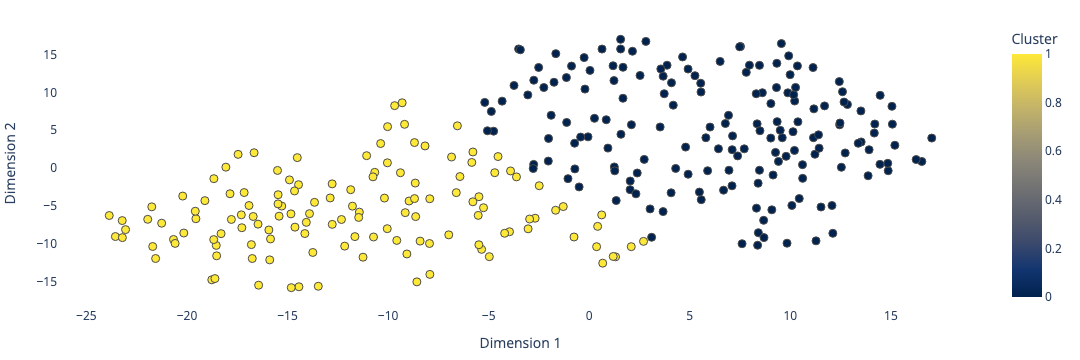

In [214]:


# Assume that 'X_tsne' is your data after t-SNE reduction and it has two dimensions
# 'df_original' is your original dataset with all the features

df_tsne = pd.DataFrame(X_tsne, columns=["Dimension 1", "Dimension 2"])
df_tsne['Cluster'] = cluster_assignments

df_tsne.to_csv('heart/modified/tsne_data.csv')

# Add original features to the DataFrame for hover data
for col in df_original_tsne.columns:
    df_tsne[col] = df_original_tsne[col]

fig = px.scatter(df_tsne, x='Dimension 1', y='Dimension 2', color='Cluster', 
                 hover_data=df_tsne.columns,  color_continuous_scale='Cividis')

fig.update_traces(marker=dict(size=8, line=dict(color='rgb(75,75,75)', width=1), color=df_tsne['Cluster'] == 1),
                  selector=dict(mode='markers'))

# fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)')

fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)', 
                  margin=dict(l=20, r=20, t=20, b=20))

fig.show()


Classification of the target

In [210]:
# Calculate the distribution of the target variable within each of the 2 clusters
cluster_dist_tsne = pd.crosstab(kmeans.labels_ , y, rownames=['Cluster'], colnames=['Heart Disease'])

cluster_dist_tsne

Heart Disease,0,1
Cluster,,
0,136,34
1,28,105


In [62]:
# Compute summary statistics for each cluster
summary_stats = df_famd.groupby('Cluster').describe()
print(summary_stats)

        Dimension 1                                                    \
              count      mean       std       min       25%       50%   
Cluster                                                                 
1             136.0  3.367358  1.591597  0.349873  1.951672  3.596608   
2             167.0 -2.742280  1.569284 -5.689324 -4.054200 -2.897479   

                            Dimension 2            ...   ca      target  \
              75%       max       count      mean  ...  75%  max  count   
Cluster                                            ...                    
1        4.782153  5.792078       136.0 -0.046998  ...  2.0  3.0  136.0   
2       -1.389037  0.318602       167.0  0.038274  ...  0.5  3.0  167.0   

                                                      
             mean       std  min  25%  50%  75%  max  
Cluster                                               
1        0.897059  0.305005  0.0  1.0  1.0  1.0  1.0  
2        0.101796  0.303290  0.0  0.0 

In [798]:
heart_noohe.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex,cp,fbs,restecg,exang,slope,thal,target
0,0.947160,0.756274,-0.264463,0.017169,1.152568,-0.721901,Male,Typical,True,Left_ventricular_hypertrophy,No,Downsloping,Fixed_defect,0
1,1.389703,1.608559,0.759159,-1.818896,0.218803,2.499716,Male,Asymptomatic,False,Left_ventricular_hypertrophy,Yes,Flat,Normal,1
2,1.389703,-0.664201,-0.341717,-0.900864,1.152568,1.425844,Male,Asymptomatic,False,Left_ventricular_hypertrophy,Yes,Flat,Reversable_defect,1
3,-1.929372,-0.096011,0.063869,1.634655,2.086334,-0.721901,Male,Non-anginal,False,Normal,No,Downsloping,Normal,0
4,-1.486829,-0.096011,-0.824558,0.978917,0.218803,-0.721901,Female,Atypical,False,Left_ventricular_hypertrophy,No,Upsloping,Normal,0


# Hyper Parameter tuning

In [216]:
import pandas as pd
import time
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

Normal Data

In [111]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters grid for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Hyperparameters grid for Logistic Regression
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Hyperparameters grid for XGBoost
xgb_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Hyperparameters grid for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Creating a dictionary of classifiers and their respective hyperparameters grids
classifiers = {
    'Random Forest': (RandomForestClassifier(random_state=42), rf_params),
    'Logistic Regression': (LogisticRegression(random_state=42, max_iter=1000), lr_params),
    'XGBoost': (XGBClassifier(random_state=42), xgb_params),
    'KNN': (KNeighborsClassifier(), knn_params)
}



# Tuning hyperparameters for each classifier using RandomizedSearchCV
for name, (clf, params) in classifiers.items():
    random_search = RandomizedSearchCV(clf, param_distributions=params, n_iter=10, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)
    random_search.fit(X_train, y_train)
    best_clf = random_search.best_estimator_
    print(f"Best parameters for {name}: {random_search.best_params_}")


Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'auto'}
Best parameters for Logistic Regression: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}


/Users/prajwalamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/prajwalamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/prajwalamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/prajwalamin/opt/anaconda3/lib/python3.9/site-packages/s

Best parameters for XGBoost: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}
Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}


FAMD data

In [251]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters grid for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Hyperparameters grid for Logistic Regression
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Hyperparameters grid for XGBoost
xgb_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Hyperparameters grid for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Creating a dictionary of classifiers and their respective hyperparameters grids
classifiers = {
    'Random Forest': (RandomForestClassifier(random_state=42), rf_params),
    'Logistic Regression': (LogisticRegression(random_state=42, max_iter=1000), lr_params),
    'XGBoost': (XGBClassifier(random_state=42), xgb_params),
    'KNN': (KNeighborsClassifier(), knn_params)
}


# Tuning hyperparameters for each classifier using RandomizedSearchCV
for name, (clf, params) in classifiers.items():
    random_search = RandomizedSearchCV(clf, param_distributions=params, n_iter=10, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)
    random_search.fit(X_train_famd, y_train_famd)
    best_clf = random_search.best_estimator_
    print(f"Best parameters for {name}: {random_search.best_params_}")


Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'log2'}
Best parameters for Logistic Regression: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.001}


/Users/prajwalamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/prajwalamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/prajwalamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/prajwalamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_mo

Best parameters for XGBoost: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01}
Best parameters for KNN: {'weights': 'uniform', 'n_neighbors': 5, 'metric': 'euclidean'}


TSNE data

In [37]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters grid for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Hyperparameters grid for Logistic Regression
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Hyperparameters grid for XGBoost
xgb_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Hyperparameters grid for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Creating a dictionary of classifiers and their respective hyperparameters grids
classifiers = {
    'Random Forest': (RandomForestClassifier(random_state=42), rf_params),
    'Logistic Regression': (LogisticRegression(random_state=42, max_iter=1000), lr_params),
    'XGBoost': (XGBClassifier(random_state=42), xgb_params),
    'KNN': (KNeighborsClassifier(), knn_params)
}


# Tuning hyperparameters for each classifier using RandomizedSearchCV
for name, (clf, params) in classifiers.items():
    random_search = RandomizedSearchCV(clf, param_distributions=params, n_iter=10, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)
    random_search.fit(X_train_tsne, y_train_tsne)
    best_clf = random_search.best_estimator_
    print(f"Best parameters for {name}: {random_search.best_params_}")


Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto'}
Best parameters for Logistic Regression: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.001}


/Users/prajwalamin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/prajwalamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/prajwalamin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/prajwalamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/prajwalamin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSear

Best parameters for XGBoost: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05}
Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'euclidean'}


# Model Training (Raw Data)

In [299]:
import pandas as pd
from prince import FAMD
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier
import time


# Create a dictionary of classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators =100, min_samples_split =4, min_samples_leaf =2, max_features= 'auto'),
    'Logistic Regression': LogisticRegression(random_state=42, solver = 'newton-cg', penalty ='l2', C = 10),
    'xgboost' : XGBClassifier(random_state=42, n_estimators = 100, max_depth = 3, learning_rate = 0.05),
    'KNN': KNeighborsClassifier(weights = 'distance', n_neighbors = 9, metric = 'manhattan')
}

# DataFrame to store evaluation metrics
results = pd.DataFrame(columns=['Classifier', 'Train Accuracy', 'Test Accuracy', 'ROC AUC Score', 'Training Time (seconds)'])

for name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    precision = precision_score(y_test, y_test_pred)
    
    recall = recall_score(y_test, y_test_pred)
    
    f1 = f1_score(y_test, y_test_pred)
    
    roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

    results = results.append({
        'Classifier': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'ROC AUC Score': roc_auc,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Training Time (seconds)': round(training_time, 2)
    }, ignore_index=True)

# Display the results table
print(results)


            Classifier  Train Accuracy  Test Accuracy  ROC AUC Score  \
0        Random Forest        0.971074       0.868852       0.942888   
1  Logistic Regression        0.871901       0.836066       0.895474   
2              xgboost        0.942149       0.868852       0.938578   
3                  KNN        1.000000       0.901639       0.962284   

   Training Time (seconds)  F1-Score  Precision   Recall  
0                     0.08  0.875000   0.875000  0.87500  
1                     0.01  0.848485   0.823529  0.87500  
2                     0.07  0.875000   0.875000  0.87500  
3                     0.00  0.906250   0.906250  0.90625  


/var/folders/xh/zlv_16bs1hvf3nww530g7jmh0000gn/T/ipykernel_39072/3439890986.py:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/xh/zlv_16bs1hvf3nww530g7jmh0000gn/T/ipykernel_39072/3439890986.py:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/xh/zlv_16bs1hvf3nww530g7jmh0000gn/T/ipykernel_39072/3439890986.py:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/xh/zlv_16bs1hvf3nww530g7jmh0000gn/T/ipykernel_39072/3439890986.py:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [296]:
# Assuming you have already trained your classifiers as per your code above

# Extracting feature importance for RandomForest
feature_importance = classifiers['Random Forest'].feature_importances_

# Creating a DataFrame for feature importance
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sorting the DataFrame based on the importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Displaying the feature importance
print(features_df)


                                Feature  Importance
5                                    ca    0.103722
8                        cpAsymptomatic    0.100124
23                           thalNormal    0.088334
3                               thalach    0.084530
0                                   age    0.073850
24                thalReversable_defect    0.070637
2                                  chol    0.070261
4                               oldpeak    0.063539
1                              trestbps    0.055217
18                             exangYes    0.047467
20                            slopeFlat    0.042615
21                       slopeUpsloping    0.038687
17                              exangNo    0.034069
6                             sexFemale    0.025526
7                               sexMale    0.024233
10                        cpNon-anginal    0.017031
14  restecgLeft_ventricular_hypertrophy    0.014086
15                        restecgNormal    0.011732
11          

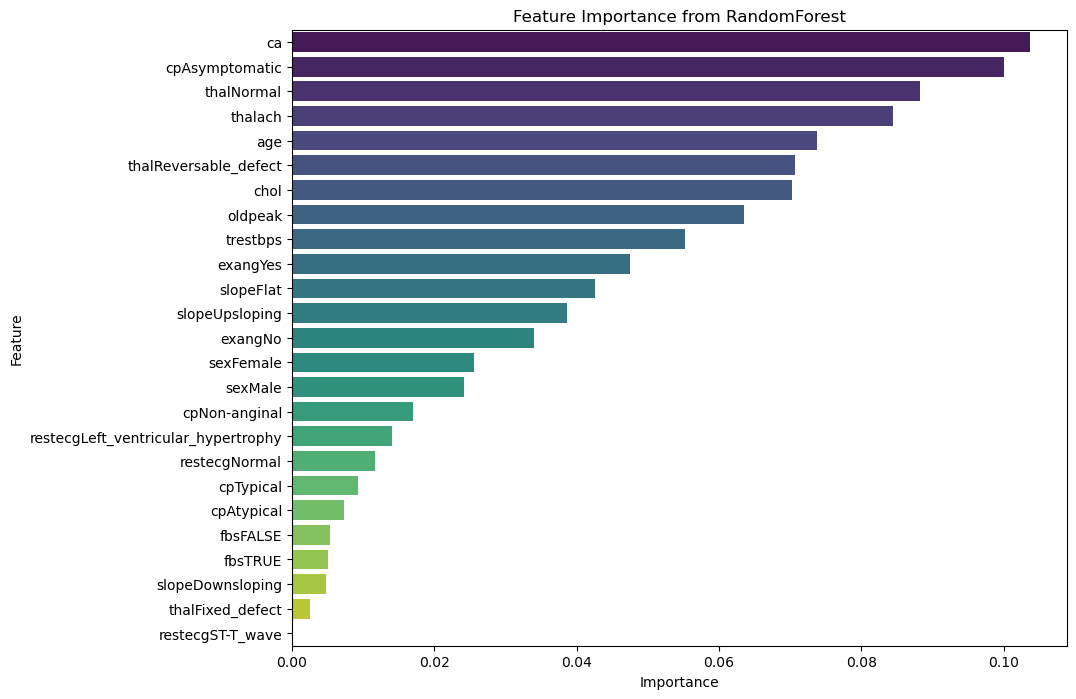

In [312]:
import seaborn as sns

# Extracting feature importance for RandomForest
feature_importance = classifiers['Random Forest'].feature_importances_

# Creating a DataFrame for feature importance
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sorting the DataFrame based on the importance
features_df = features_df.sort_values(by='Importance', ascending=False)



# Plotting the feature importance using seaborn
plt.figure(figsize=(10, 8))
sns.barplot(y='Feature', x='Importance', data=features_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from RandomForest')
plt.show()


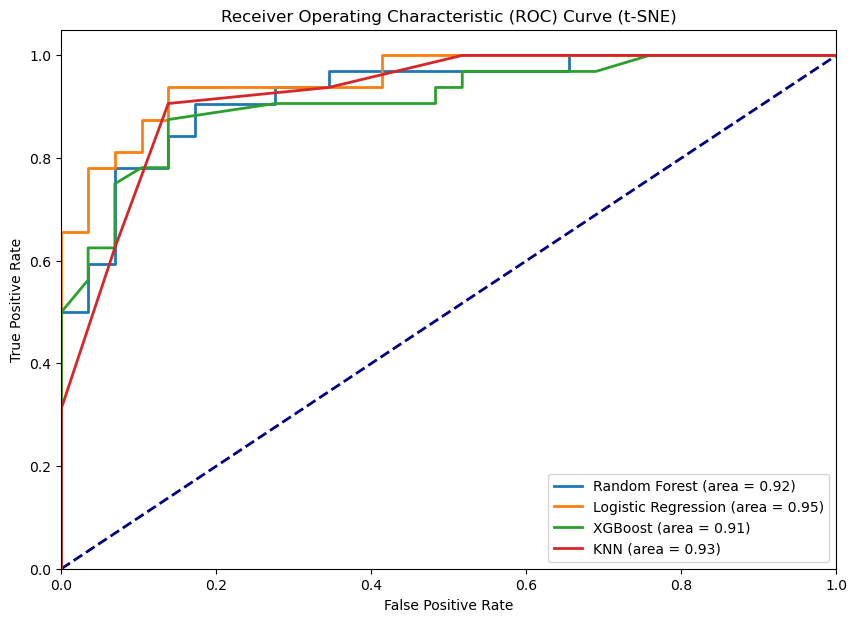

In [295]:
# Plotting ROC curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 7))
    lw = 2  # linewidth

    # Plotting the diagonal line
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    
    # For each model, compute and plot ROC curve
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            probabilities = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, probabilities)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=lw, label='%s (area = %0.2f)' % (name, roc_auc))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (t-SNE)')
    plt.legend(loc="lower right")
    
    # Save the figure
    plt.savefig('roc_famd.png', dpi=300, bbox_inches='tight')

    
    plt.show()

# Plot ROC curves
plot_roc_curve(classifiers_famd, X_test_famd, y_test_famd)


# Model Training (FAMD)

In [285]:
import pandas as pd
from prince import FAMD
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier
import time

# Apply FAMD
famd = FAMD(n_components=9, n_iter=10, random_state=42)
X_famd = famd.fit_transform(X_noohe)

# Split the data into training and testing sets (80% train, 20% test)
X_train_famd, X_test_famd, y_train_famd, y_test_famd = train_test_split(X_famd, y, test_size=0.20, random_state=42)

# Defining Tuned Classifiers
classifiers_famd = {
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators= 200, min_samples_split= 6, min_samples_leaf= 2, max_features= 'log2'),
    'Logistic Regression': LogisticRegression(random_state=42, solver= 'lbfgs', penalty= 'l2', C=0.001 ),
    'XGBoost': XGBClassifier(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.01),
    'KNN': KNeighborsClassifier(weights='uniform', n_neighbors=5, metric='euclidean')
}

# DataFrame to store evaluation metrics
results = pd.DataFrame(columns=['Classifier', 'Train Accuracy', 'Test Accuracy', 'ROC AUC Score', 'Training Time (seconds)'])

# Train and evaluate each classifier
for name, clf in classifiers_famd.items():
    start_time = time.time()
    clf.fit(X_train_famd, y_train_famd)
    end_time = time.time()
    training_time = end_time - start_time
    
    y_train_pred = clf.predict(X_train_famd)
    train_accuracy = accuracy_score(y_train_famd, y_train_pred)
    
    y_test_pred = clf.predict(X_test_famd)
    test_accuracy = accuracy_score(y_test_famd, y_test_pred)
    
    precision = precision_score(y_test_famd, y_test_pred)
    
    recall = recall_score(y_test_famd, y_test_pred)
    
    f1 = f1_score(y_test_famd, y_test_pred)
    
    roc_auc = roc_auc_score(y_test_famd, clf.predict_proba(X_test_famd)[:, 1])

    results = results.append({
        'Classifier': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'ROC AUC Score': roc_auc,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Training Time (seconds)': round(training_time, 2)
    }, ignore_index=True)

# Display the results table
print(results)


            Classifier  Train Accuracy  Test Accuracy  ROC AUC Score  \
0        Random Forest        0.933884       0.836066       0.924569   
1  Logistic Regression        0.818182       0.803279       0.952586   
2              XGBoost        0.876033       0.836066       0.912177   
3                  KNN        0.834711       0.885246       0.925647   

   Training Time (seconds)  F1-Score  Precision   Recall  
0                     0.16  0.838710   0.866667  0.81250  
1                     0.00  0.777778   0.954545  0.65625  
2                     0.04  0.827586   0.923077  0.75000  
3                     0.00  0.892308   0.878788  0.90625  


/var/folders/xh/zlv_16bs1hvf3nww530g7jmh0000gn/T/ipykernel_39072/540446645.py:51: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/xh/zlv_16bs1hvf3nww530g7jmh0000gn/T/ipykernel_39072/540446645.py:51: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/xh/zlv_16bs1hvf3nww530g7jmh0000gn/T/ipykernel_39072/540446645.py:51: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/xh/zlv_16bs1hvf3nww530g7jmh0000gn/T/ipykernel_39072/540446645.py:51: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



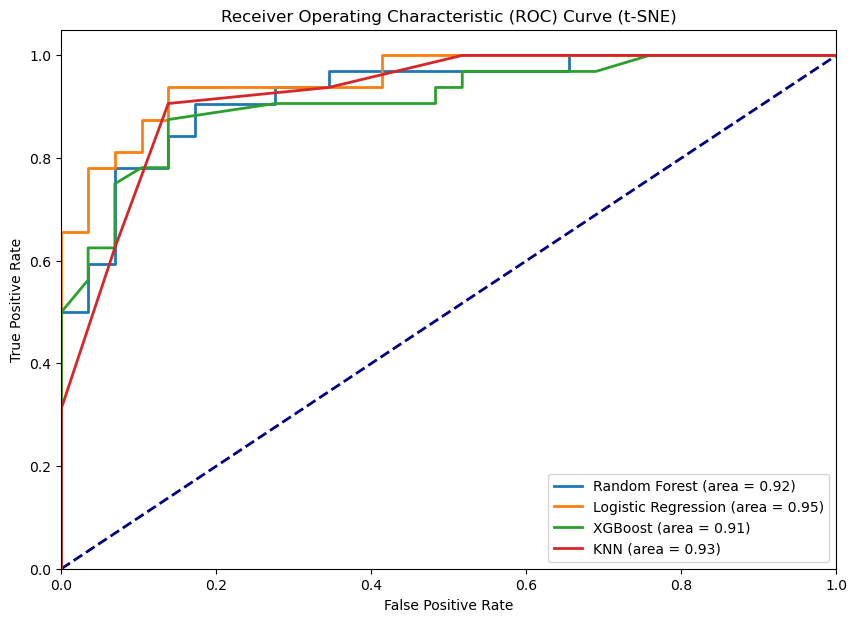

<Figure size 640x480 with 0 Axes>

In [294]:

# Plot ROC curves
plot_roc_curve(classifiers_famd, X_test_famd, y_test_famd)

# Save the figure
plt.savefig('roc_famd.png', dpi=300, bbox_inches='tight')


# Model Training (t-SNE)

In [287]:
import pandas as pd
import time
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# Apply t-SNE
tsne = TSNE(n_components=8, random_state=42, init='random', learning_rate='auto', method='exact')
X_tsne = tsne.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

# Defining Tuned Classifiers
classifiers_tsne = {
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features='auto'),
    'Logistic Regression': LogisticRegression(random_state=42, solver='newton-cg', penalty='l2', C=0.001),
    'XGBoost': XGBClassifier(random_state=42, n_estimators=300, max_depth=3, learning_rate=0.05),
    'KNN': KNeighborsClassifier(weights='distance', n_neighbors=7, metric='euclidean')
}

# DataFrame to store evaluation metrics
results = pd.DataFrame(columns=['Classifier', 'Train Accuracy', 'Test Accuracy', 'ROC AUC Score', 'Precision', 'Recall', 'F1-Score', 'Training Time (seconds)'])

# Train and evaluate each classifier
for name, clf in classifiers_tsne.items():
    start_time = time.time()
    clf.fit(X_train_tsne, y_train_tsne)
    end_time = time.time()
    training_time = end_time - start_time
    
    y_train_pred = clf.predict(X_train_tsne)
    train_accuracy = accuracy_score(y_train_tsne, y_train_pred)
    
    y_test_pred = clf.predict(X_test_tsne)
    test_accuracy = accuracy_score(y_test_tsne, y_test_pred)
    precision = precision_score(y_test_tsne, y_test_pred)
    recall = recall_score(y_test_tsne, y_test_pred)
    f1 = f1_score(y_test_tsne, y_test_pred)
    roc_auc = roc_auc_score(y_test_tsne, clf.predict_proba(X_test_tsne)[:, 1])

    results = results.append({
        'Classifier': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'ROC AUC Score': roc_auc,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Training Time (seconds)': round(training_time, 2)
    }, ignore_index=True)

# Display the results table
print(results)


            Classifier  Train Accuracy  Test Accuracy  ROC AUC Score  \
0        Random Forest        1.000000       0.885246       0.926185   
1  Logistic Regression        0.809917       0.885246       0.901940   
2              XGBoost        1.000000       0.836066       0.898707   
3                  KNN        1.000000       0.836066       0.906250   

   Precision   Recall  F1-Score  Training Time (seconds)  
0   0.931034  0.84375  0.885246                     0.08  
1   0.931034  0.84375  0.885246                     0.02  
2   0.892857  0.78125  0.833333                     0.15  
3   0.866667  0.81250  0.838710                     0.00  


/var/folders/xh/zlv_16bs1hvf3nww530g7jmh0000gn/T/ipykernel_39072/2899626079.py:46: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/prajwalamin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/Users/prajwalamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning:

Line Search failed

/var/folders/xh/zlv_16bs1hvf3nww530g7jmh0000gn/T/ipykernel_39072/2899626079.py:46: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/xh/zlv_16bs1hvf3nww530g7jmh0000gn/T/ipykernel_39072/2899626079.py:46: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/xh/zlv_16bs1hvf3nww530g7jmh0000gn/T/ipykernel_39

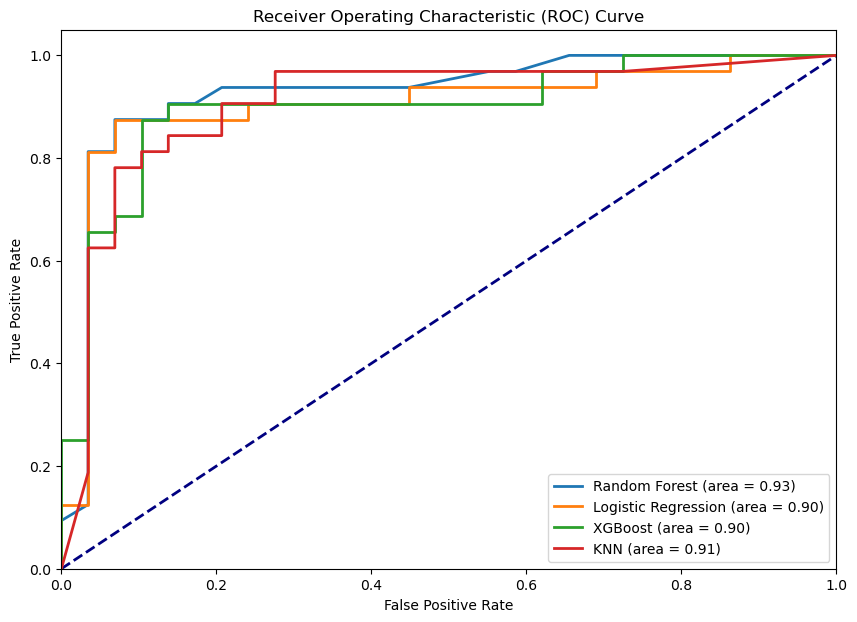

In [81]:
# Plot ROC curves
plot_roc_curve(classifiers_tsne, X_test_tsne, y_test_tsne)